***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [1. Radio Science using Interferometric Arrays](1_0_introduction.ipynb)  
    * Previous: [1.9 A brief introduction to interferometry](1_9_a_brief_introduction_to_interferometry.ipynb)
    * Next: [1.11 Modern Interferometric Arrays](1_11_modern_interferometric_arrays.ipynb)
   
***

Section status: <span style="background-color:yellow">&nbsp;&nbsp;&nbsp;&nbsp;</span>

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
import ipywidgets
from IPython.display import Image

In [3]:
HTML('../style/code_toggle.html')

## 1.10 The Limits of Single Dish Astronomy

In the [previous section &#10142;](1_9_a_brief_introduction_to_interferometry.ipynb) of this chapter we introduced the concepts and historical background of interferometry.  Earlier in the chapter we presented some of the basic astrophysical sources which emit in the radio spectrum. In this section we will try to answer why we need to use interferometry in radio astronomy. A related question we will try to answer is why we can not just use a single telescope as is done in traditional optical astronomy.

Single telescopes are used in radio astronomy, and provide complimentary observational data to that of interferometric arrays. Astronomy with a single radio telescope is often called *single dish astronomy* as the telescope usually has a dish reflector (Figure 1.10.1). This dish is usually parabolic, but other shapes are also used, as it allows for the focusing of light to a single focal point where a receiver is placed - among other instruments this could be a camera in the optical, a bolometer in the far-infrared, or an antenna feed in the radio. Instead of a single dish telescope, a more general term would be a single *element* telescope which can be as simple as a dipole (Figure 1.10.2). An interferometric array (Figure 1.10.3) is used to create a *synthesized telescope* as it is considered a single telescope synthesized out of many elements (each element is also a telescope, it can get even more confusing).

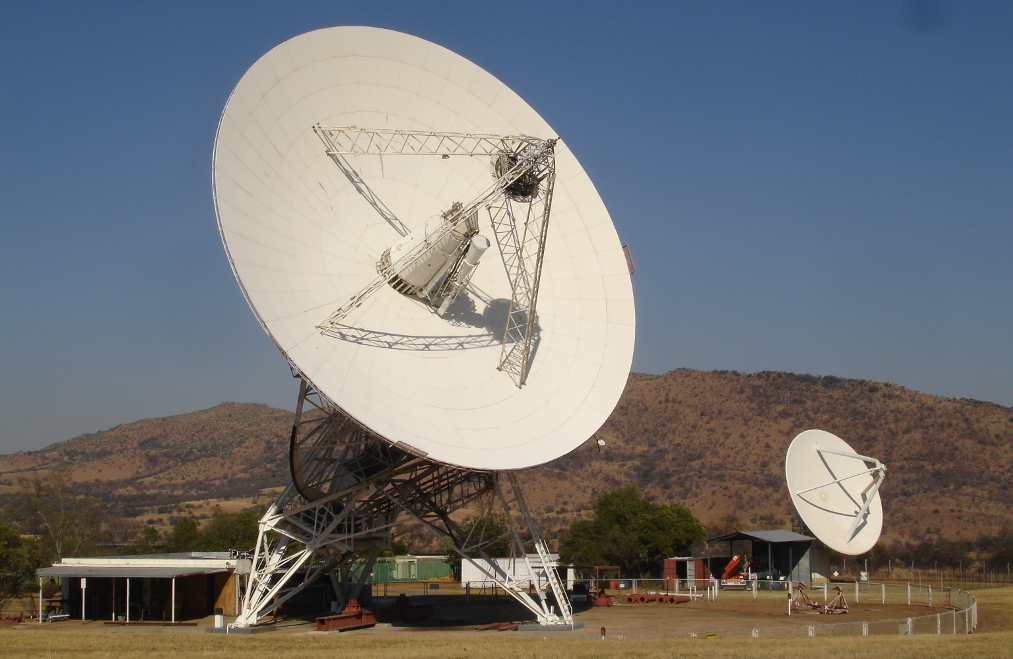

In [4]:
Image(filename='figures/hart_26m_15m_2012-09-11_08511.jpg')

**Figure 1.10.1:** *26 meter dish at HartRAO, South Africa used for single dish observations and as part of interferometric VLBI networks. Credit: [M Gaylard / HartRAO&#10548;](http://www.hartrao.ac.za/gallery/hart_26m+15m_2012-09-11_08511.JPG)*

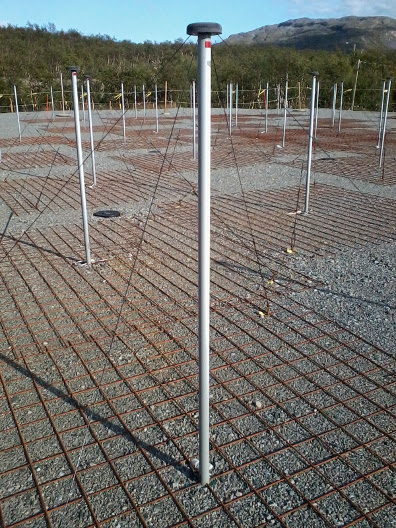

In [5]:
Image(filename='figures/kaira_lba_element.jpg')

**Figure 1.10.2:** *LOFAR LBA dipole element. Credit: [KAIRA/D. McKay-Bukowski&#10548;](http://2.bp.blogspot.com/-PbnZmI4iiEc/U_C-5rPthuI/AAAAAAAAEKU/iuHEGEK7NLo/s1600/Photo1566.jpg)*

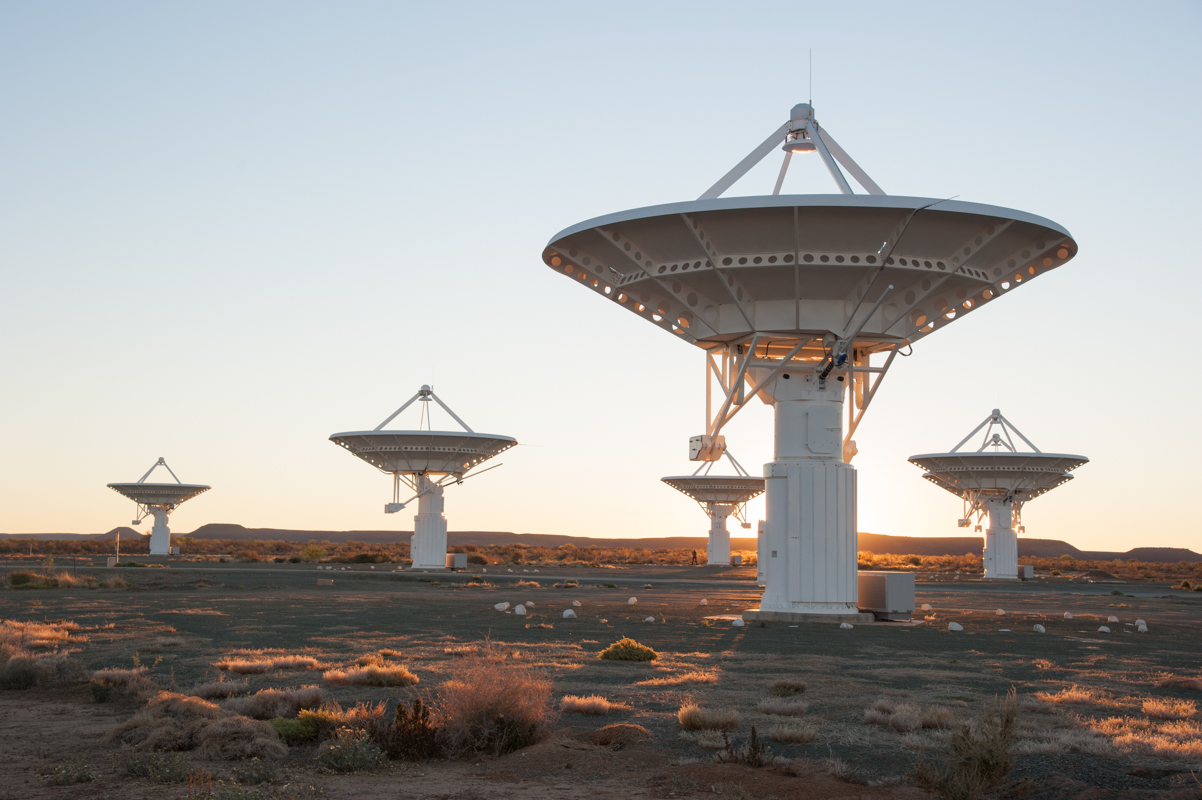

In [6]:
Image(filename='../5_Imaging/figures/2013_kat7_20.jpg')

**Figure 1.10.3:** *Inner 5 dishes of KAT-7, a 7 element interferometric array located in South Africa which can be combined into a single synthesized telescope. Credit: [SKA-SA&#10548;](http://www.ska.ac.za/media/2013_kat7.php)*

<span style="background-color:yellow"> LB:LF:this link seems to have died</span>

Depending on the science goals of an experiment or observatory, different types of telescopes are built. So what is the main driver for building an interferometric array to create a synthesized telescope? It all comes down to the resolution of a telescope, a property which is related to the wavelength of incoming light and the physical size of the telescope.

### 1.10.1. Aperture Diameter and Angular Resolution

If we consider a generic dish radio telescope, ignoring blockage from feeds and structure and any practical issues, we can think of the dish as having a circular aperture. We will use the term 'primary beam' later in Chapter 7 to discuss this aperture in detail. Until then we can think of the dish aperture size as being the *collecting area*. The larger the aperture the more collecting area, thus the more *sensitive* (a measure of how well the telescope is able to measure a signal) the telescope. This is the same as in photography. Since we are modelling our simple telescope as a circle then the collection area $A$, or aperture size, is proportional to the diameter of the dish $D$.

$$A \propto D^2$$

A larger aperture also increases the maximum *angular resolution* of the telescope i.e. the ability to differentiate between two sources (say stars) which are separated by some angular distance. Using the *Rayleigh criterion* the angular resolution $\Delta \theta$ (in radians) of a dish of diameter $D$ is

$$\Delta \theta = 1.22 \frac{\lambda}{D}$$

where $\lambda$ is the observing wavelength. Since light in the radio regime of the electromagnetic spectrum has a longer wavelength compared to that in the optical regime, we can see that a radio telescope with the same collecting area diameter as an optical telescope will have a much lower angular resolution.

<div class=warn>
<b>Warning:</b> Note that a higher value of $\Delta \theta$ implies lower angular resolution and vice versa. 
</div>

The sensitivity of a telescope is directly proportional to its collecting area. The angular resolution of the telescope is inversely proportional to the aperture diameter. Usually, we want both high sensitivity and fine angular resolution, since we are interested in accurately measuring the strength of the signal and positions of sources. A natural way to improve both the sensitivity and angular resolution of a single telescope is to increase the collecting area.

The following table shows the angular resolution as a function of aperture diameter $D$ and observing wavelength for a single dish telescope.

| Telescope Type | Angular Resolution <br> $\Delta \theta$ | Visible <br> $\lambda$ = 500 nm | Infrared <br> $\lambda$ = 10 $\mu$m | Radio EHF <br> $\lambda$ = 10 mm <br> 30 GHz | Radio UHF <br> $\lambda$ = 1 m <br> 300 Mhz|
|:---:|:---:|:---:|:---:|:---:|:---:|
| Amatuer | 0.8'' | 15 cm | 3 m | 3 km | 300 km |
| Automated Follow-up | 0.25'' | 50 cm | 10 m | 10 km | 100 km |
| Small Science | 0.12'' | 1 m | 21 m | 21 km | 2100 km |
| Large Science | 0.015'' (15 mas) | 8 m | 168 m | 168 km | 16800 km |

**Table 1.10.1:** *Angular resolution of a telescope as a function of the aperture diameter $D$ and observing wavelength.*

As we can see from the table, a radio telescope requires a diameter which is many orders of magnitude larger than that of an optical telescope to achieve the same angular resolution. It is very reasonable to build a 15 cm optical telescope, in fact they can be easily bought at a store. But a radio telescope, observing at 300 MHz, which has the same resolution (0.8 arcseconds) needs to have an aperture of 300 km! Now, this would not only be prohibitively expensive, but the engineering is completely infeasible. Just for reference, the largest single dish telescopes are on the order of a few hundred meters in diameter (see FAST in China, Arecibo in Puerto Rico). The following example shows how the diameter of a telescope varies as a function of observing wavelength and desired angular resolution.

In [7]:
def WhichDiameter(wavelength=1., angres=(15e-3/3600)):
    """Compute the diameter of an aperture as a function of angular resolution and observing wavelength"""
    c = 299792458. #spped of light, m/s
    freq = c/(wavelength)/1e6 #
    D = 1.22 * wavelength/np.radians(angres) # assuming a circular aperture

    print("""
At a frequency of %.3f MHz (Lambda = %.3f m)'%(freq, wavelength)
the aperture diameter is D = %f m'%D
to achieve an angular resolution of %f degrees / %f arcmin / %f arcsec'%(angres, angres*60, angres*3600)
""")
    
w = ipywidgets.interact(WhichDiameter, angres=((15e-3/3600), 10, 1e-5), wavelength=(0.5e-6, 1, 1e-7))


At a frequency of %.3f MHz (Lambda = %.3f m)'%(freq, wavelength)
the aperture diameter is D = %f m'%D
to achieve an angular resolution of %f degrees / %f arcmin / %f arcsec'%(angres, angres*60, angres*3600)



### 1.10.2 Physical limitations of single dishes

There are certain physical limitations to account for when designing single dish radio telescopes. As an example consider that, due to its limited field of view and the rotation of the earth, an antenna will have to track a source on the sky to maintain a constant sensitivity. In principle this can be achieved by mounting the antenna on a pedestal and mechanically steering it with a suitable engines. However, in order to maintain the integrity of the antenna, the control systems for these engines need to be incredibly precise. Clearly, this gets harder as the size of the instrument increases and will constitute a critical design point on the engineering side. This is true in the optical case as well, but it is easier to manage as the telescopes are physically much smaller. 

There is an upper limit on how large we can build steerable single dish radio telescopes. This is because, just like everything else, the metals that these telescopes are made out of can only withstand finite amounts of stress and strain before deforming. Perhaps one of the greatest reminders of this fact came in 1988 with the [<cite data-cite='2008ASPC..395..323C'>collapse of the 300 foot Green Bank Telescope</cite> &#10548;](http://adsabs.harvard.edu/abs/2008ASPC..395..323C) (see **Figure 1.10.4**). Clearly, large steerable telescopes run the risk of collapsing under their own weight. The 100 meter Green Bank Telescope (GBT) which replaced the 300 foot telescope is the largest steerable telescope in the world.

Larger single dish apertures can still be reached though. By leaving the reflector fixed and allowing the receiver at the focus to move along the focal plane (or along the caustic) of the instrument will mimic a slowly varying pointing in the sky (a so called steerable focus telescope). Indeed, this is how the Arecibo Observatory radio telescope (see **Figure 1.10.5**) operates. However, steerable focus telescopes come with limitations of their own (e.g. material cost and available space). In order to overcome these physical limitations and achieve a higher angular resolution we must use interferometric arrays to form a synthesized telescope.

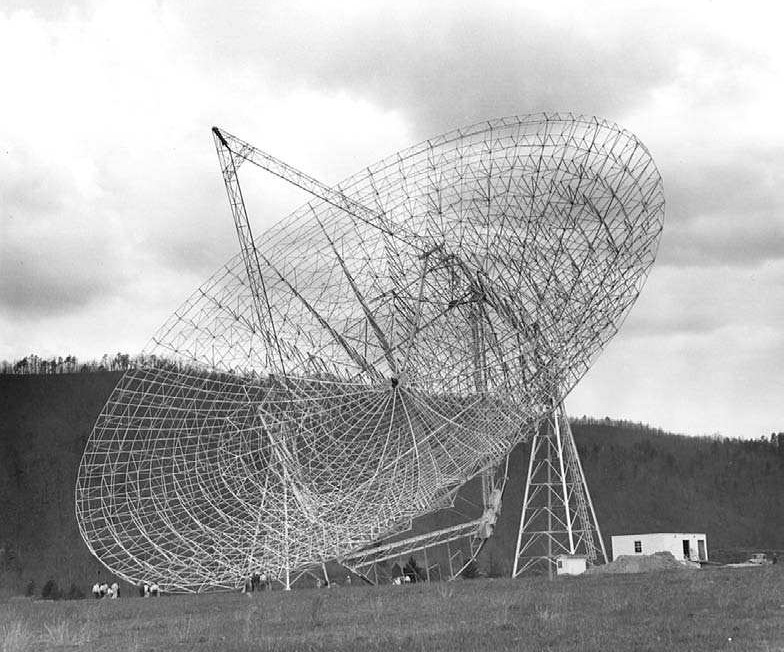

In [8]:
Image(filename='figures/gbt_300foot_telescope.jpg')

**Figure 1.10.4a:** *300 foot Green Bank Telescope located in West Virgina, USA during initial operations in 1962. Credit: [NRAO&#10548;](http://adsabs.harvard.edu/abs/2008ASPC..395..323C)*

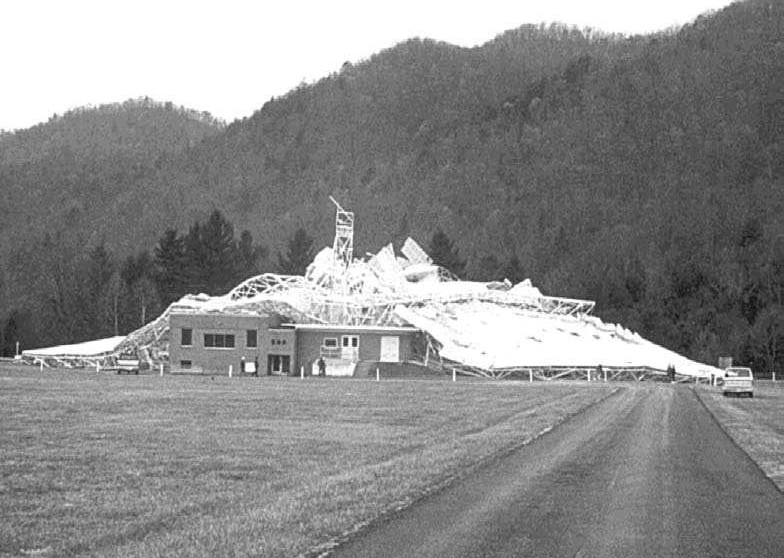

In [9]:
Image(filename='figures/gbt_300foot_collapse.jpg')

**Figure 1.10.4b:** *November, 1988, a day after the collapse of the 300 foot GBT telescope due to structural defects. Credit: [NRAO&#10548;](http://adsabs.harvard.edu/abs/2008ASPC..395..323C)*

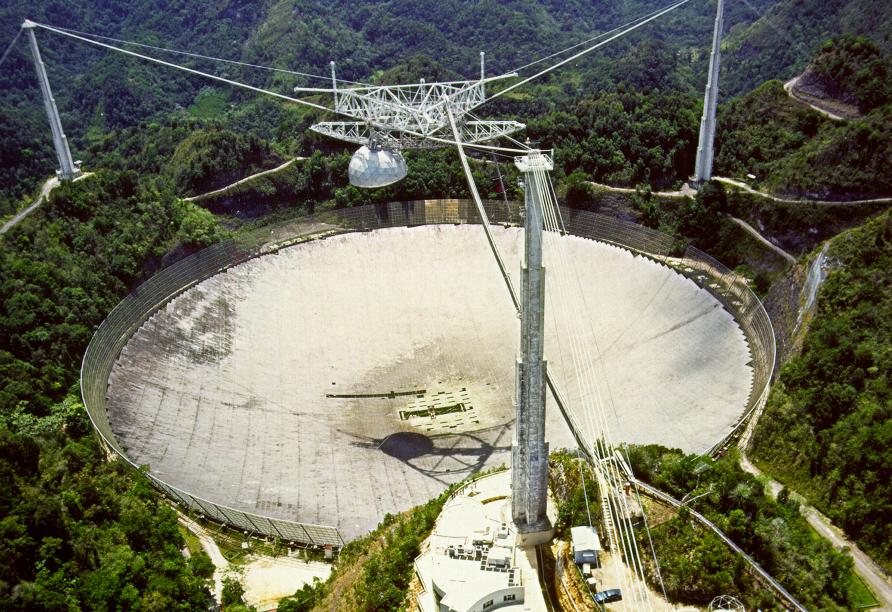

In [10]:
Image(filename='figures/arecibo_observatory.jpg')

**Figure 1.10.5:** *300 m Arecibo Telescope lying in a natural cavity in Puerto Rico. The receiver is located in the white spherical structure held up by wires, and is repositioned to "point" the telescope. Credit: [courtesy of the NAIC - Arecibo Observatory, a facility of the NSF&#10548;](http://www.naic.edu/public/about/photos/hires/ao001.jpg)*

### 1.10.3 Creating a Synthesized Telescope using Interferometry

Here we will attempt to develop some intuition for what an interferometric array is and how it is related to a single dish telescope. We will construct a cartoon example before getting into the mathematics. A simple single dish telescope is made up of a primary reflector dish on a mount to point in some direction in the sky and a signal receptor at the focal point of the reflector (Figure 1.3.6a). The receptor is typically an antenna in the case of radio astronomy or a camera in optical astronomy. 

Basic optics tells us how convex lenses can be used to form real images of sources that are very far away. The image of a source that is infinitely far away will form at exactly the focal point of the lens, the location of which is completely determined by the shape of the lens (under the "thin lens" approximation). Sources of astrophysical interest can be approximated as being infinitely far away as long as they are at distances much farther away than the focal point of the lens. This is immediately obvious from the equation of a thin convex lens:

$$ \frac{1}{o} + \frac{1}{i} = \frac{1}{f}, $$

where $i, ~ o$ and $f$ are the image, object and focal distances respectively. Early astronomers exploited this useful property of lenses to build the first optical telescopes. Later on concave mirrors replaced lenses because it was easier to control their physical and optical properties (e.g. curvature, surface quality etc.). Reflective paraboloids are the most efficient at focussing incoming plane waves (travelling on-axis) into a single locus (the focal point) and are therefore a good choice for the shape of a collector.

In our simple model the sky only contains a single astrophysical source, which is detected by pointing the telescope towards its location in the sky.

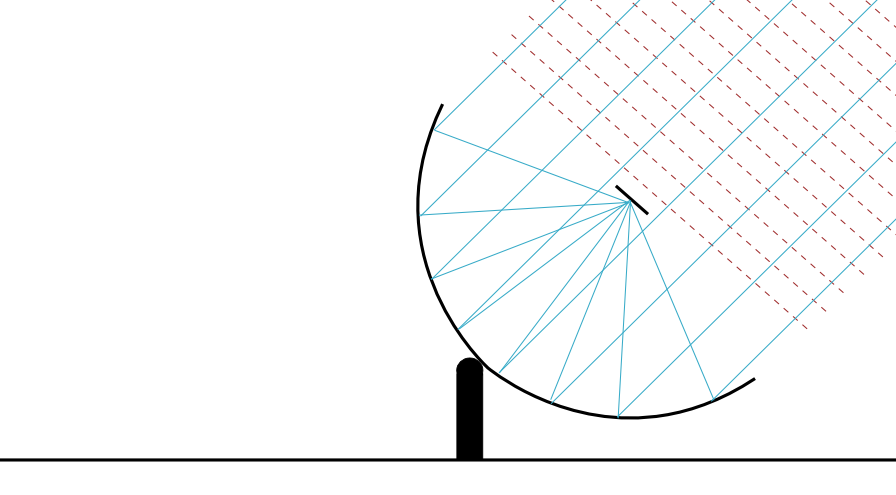

In [11]:
Image(filename='figures/cartoon_1.png')

**Figure 1.10.6a:** *A simple dish telescope which reflects incoming plane waves (red dashed) along ray tracing paths (cyan) to a receptor at the focal point of the parabolic dish.*

Ignoring real world effects like aperture blockage and reflector inefficiencies, plane waves are focused to a single point using a parabolic reflector (at that focus if a signal receptor). We can imagine the reflector is made up of many smaller reflectors, each with its own reflection path. A single dish, in the limit of fully sampling the observing wavelength $\lambda$, can be thought of as being made up of enough reflectors of diameter $\lambda/2$ to fill the collecting area of the dish. In our simple example, we just break the dish into 8 reflectors (Figure 1.10.6b). This is in fact what is often done with very large telescopes when it is not feasible to build a single large mirror, such as in the W. M. Keck Observatory. At this point we have not altered the telescope, we are just thinking about the reflector as being made up of multiple smaller reflectors.

<div class=advice>
<b>Note:</b> We can interpret a single dish telescope as a *continuous interferometer* by applying the Wiener-Khinchin theorem. See Chapter 2 of [<cite data-cite='2007isra.book.....T'>Interferometry and Synthesis in Radio Astronomy</cite> &#10548;](http://adsabs.harvard.edu/abs/2007isra.book.....T) for an in depth discussion.
</div>

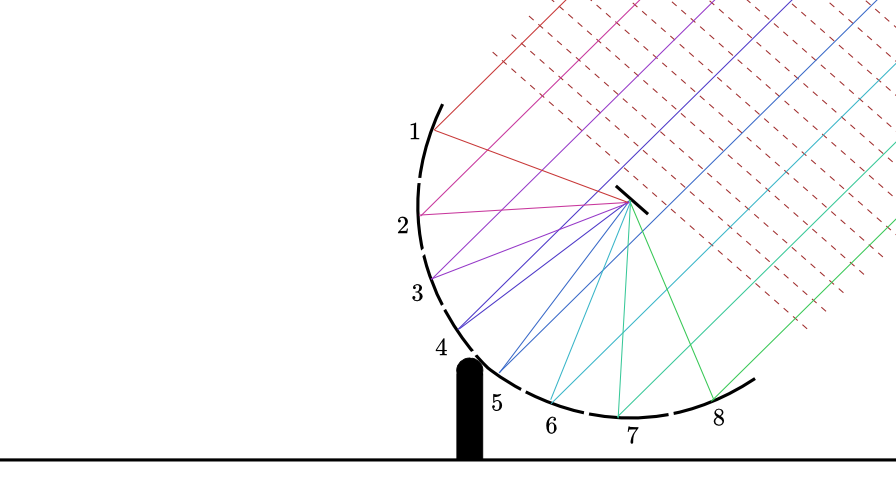

In [12]:
Image(filename='figures/cartoon_2.png')

**Figure 1.10.6b:** *The dish reflector can be thought of as being made up of multiple smaller reflectors, each with its own light path to the focus.*

Now, instead of capturing all the signal at a single point, there is no reason we can not capture the signal at the smaller, individual reflector focus points. If that signal is captured, we can digitally combine the signals at the main focus point later (Figure 1.10.6c). This is the first trick of interferometry. Radio waves can be sufficiently sampled in time to digitally record the signals (this becomes more difficult at higher frequencies, and not possible in the near-infrared and higher). The cost is that a receptor needs to be built for each sub-reflector, and additional hardware is required to combine the signals. The dish optically combines the light, we are simply doing the same thing digitally.

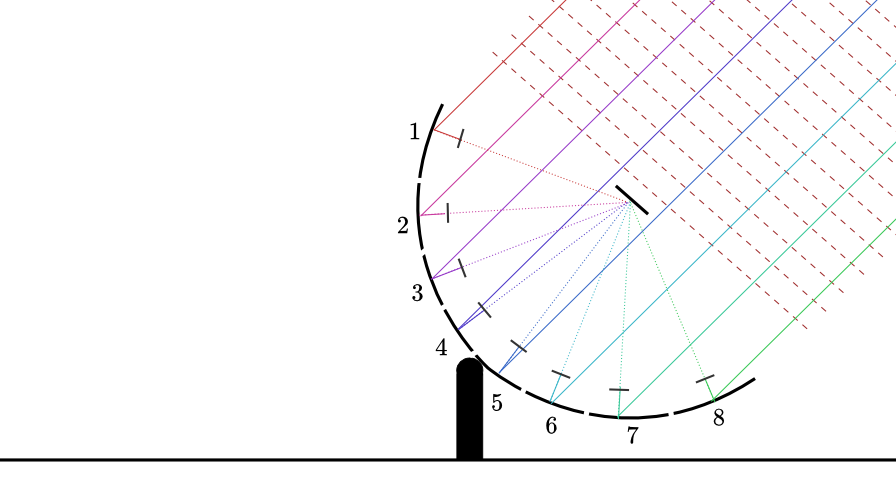

In [13]:
Image(filename='figures/cartoon_3.png')

**Figure 1.10.6c:** *A receptor at each sub-reflector captures the light signals. To recreate the combined signal at the main receptor the signals are digitally combined.*

The next leap is that there is no reason the sub-reflectors need to be set in the shape of a dish since the combination of the signal at the main focus is performed done digitally. Since light travels at a constant speed any repositioning of a sub-reflector just requires a time delay correction. So we can move each element to the ground and construct a pointing system for each sub-reflector (Figure 1.10.6d). We now have an array of smaller single dish telescopes! By including the correct time delays on each signal, we can measure the same signal as the original, larger single dish telescope. This digital operation is called *beamforming* and is very important in interferometry.

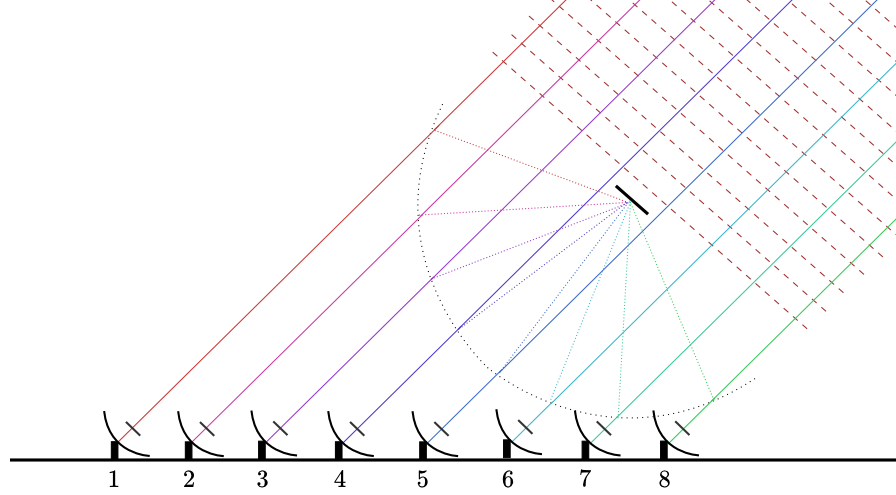

In [14]:
Image(filename='figures/cartoon_4.png')

**Figure 1.10.6d:** *The sub-reflector elements of the original telescope are set on the ground with their own pointing systems. The original signal can be reconstructed digitally and by including the appropriate time delay for each telescope.*

The beamforming operation recombines all the signals into a single signal, which can be thought of as a single pixel camera. However, we can do even better using a *correlator*. By correlating the signals we can compute *visibilities* which are then used to form an image (Figure 1.10.6e). This will be explained in more depth in the chapters that follow. For now it is important to know that interferometric arrays have an advantage over single dish telescopes viz. by combining signals from multiple smaller telescopes we can 'synthesize' a much larger telescope than can be constructed from a single dish. The correlator also allows for the creation of image over a beamformer at the cost of additional computing hardware.

<span style="background-color:yellow"> LB:RC: this last sentence is not clear, I am not sure what it is trying to say</span>

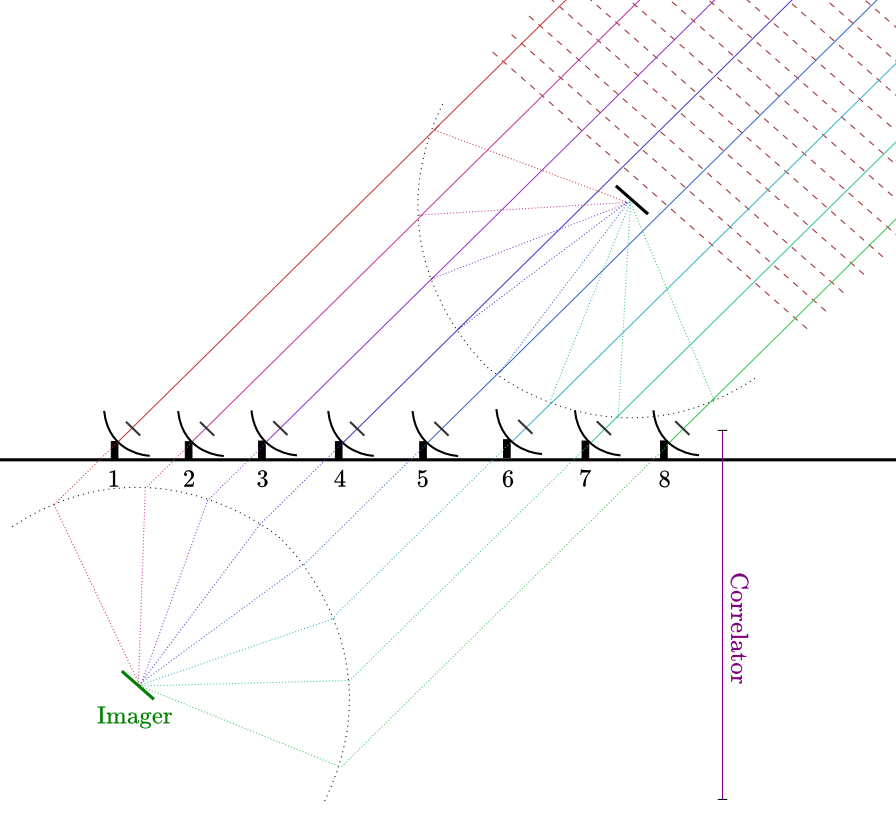

In [15]:
Image(filename='figures/cartoon_5.png')

**Figure 1.10.6e:** *By using correlator hardware instead of a beamformer an image of the sky can be created.*

The next trick of interferometry is that we do not necessarily need to sample the entire original dish (Figure 1.10.6f). We do lose sensitivity and, as will be discussed in later chapters, spatial frequency modes, but by using only a subset of elements and exploiting interferometry we can build synthesized telescopes that are many kilometres in diameter (e.g. MeerKAT) or as large as the Earth (e.g. VLBI networks). This is why radio interferometry can be used to produce the highest resolution telescopes in the world.

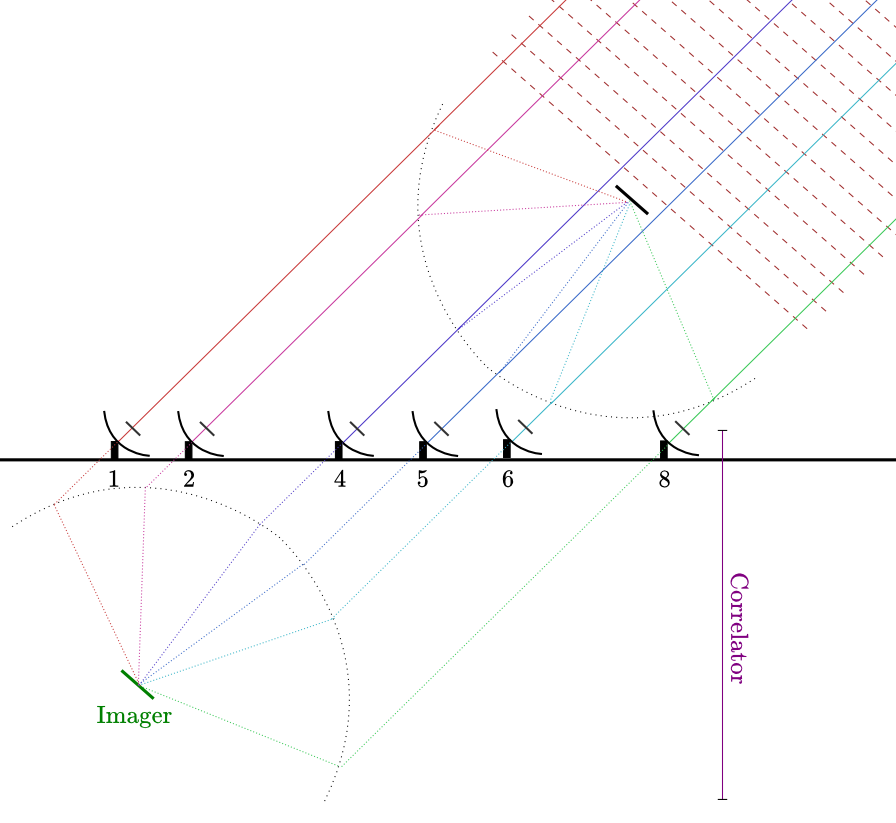

In [16]:
Image(filename='figures/cartoon_6.png')

**Figure 1.10.6f:** *Radio interferometric arrays do not need to sample every location of the original telescope, this allows for 'synthesized' telescopes with diameters comparable to the diameter of Earth.*

This simple example hides much of the detail and we have yet to discuss the limitations of interferometric arrays and synthesized telescopes. But, for the moment, it is sufficient to think of interferometry as a method for overcoming the physical and engineering limitations inherent in building a single, massive telescope. This comes at the cost of additional digital hardware.

In this introductory section we have highlighted why we need multi-element instruments. Since radio observations are at a much longer wavelength (lower frequency) than those made in the visible, we would need much bigger radio telescopes to achieve the same angular resolution of optical telescopes. Array telescopes allow us to increase angular resolution and, by adding together the collecting areas of all the telescopes in the array, increase the sensitivity of the telescope. Because of the physical limitations involved in constructing very large single dish telescopes, it would be very difficult (and expensive) to achieve the same resolution and sensitivity with a single dish as can be achieved with an array of telescopes. However, as we will see, interferometry introduces a number of additional challenges.

In the next section we will provide an overview of common interferometric arrays in use, the main science goals of the arrays, and future arrays in development.

<p class=conclusion>
  <font size=4> <b>Important things to remember</b></font>
  <br>
  <br>

&bull; A <b>paraboloid reflector</b> can be used to focus light from the far field to a single focal plane.<br>
&bull; The reflector mirror is an easier optical system to build and maintain compared to a transmitting lens.<br>
&bull; As we are dealing with EM waves, there is a *direct analogy between the properties of visible and radio telescopes*.<br>
&bull; In principle, an interferometer can be built by <em>decomposing a single reflector instrument into smaller manageable pieces</em> and by <em>combining their signals in a specific manner</em>.<br>
&bull; Conversely, a single reflector telescope can be interpreted as a <em>continuous</em> interferometer.
</p>

*** 

* Next: [1.11 Modern Interferometric Arrays](1_11_modern_interferometric_arrays.ipynb)

<div class=warn><b>Future Additions:</b></div>

* reframe as aperture synthesis. resolution is important, but if that was all we wanted then we could just build beamformers, the real advantage is the imaging.